## Data

In [1]:
# data
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# process and normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Model

In [3]:
# install
!pip install git+https://github.com/yiqiao-yin/WYNAssociates.git # in command line

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yiqiao-yin/WYNAssociates.git to /tmp/pip-req-build-hlva6rlp
  Running command git clone -q https://github.com/yiqiao-yin/WYNAssociates.git /tmp/pip-req-build-hlva6rlp
  Created wheel for WYNAssociates: filename=WYNAssociates-1.1-py3-none-any.whl size=32237 sha256=2aa33f35268539a8e82a92d63959ab79e926d9985088f6943c6c71d701bc1220
  Stored in directory: /tmp/pip-ephem-wheel-cache-jcpt3tn3/wheels/e7/8d/cb/5eaa7fa9db48dbabd76f0c5e07ad4946ca059ecfaa79e94c49
Successfully built WYNAssociates


## Import Model

In [5]:
# import 
from AIsolution.modules import YinsDL

---------------------------------------------------------------------

        Yin's Deep Learning Package 
        Copyright © W.Y.N. Associates, LLC, 2009 – Present
        For more information, please go to https://wyn-associates.com/
        
---------------------------------------------------------------------


## Training

In [6]:
# run
some_result_ = YinsDL.NeuralNet_Regressor(
            X_train=x_train,
            y_train=x_train, 
            X_valid=x_test, 
            y_valid=x_test, 
            X_test=x_test, 
            y_test=x_test,
            name_of_architecture="ANN",
            input_shape=784,
            use_auxinput=False,
            num_of_res_style_block=None,
            hidden=[128,64,32,2,32,64,128],
            output_shape=784,
            activation="relu",
            last_activation="sigmoid",
            learning_rate=0.001,
            loss="mae",
            name_of_optimizer="adam",
            epochs=10,
            plotModelSummary=True,
            axis_font_size=20,
            which_layer=4,
            X_for_internal_extraction=x_test,
            useGPU=False,
            use_earlystopping=False,
            do_plot=False,
            verbose=True
        )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 dense1 (Dense)              (None, 128)               100480    
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 dense4 (Dense)              (None, 2)                 66        
                                                                 
 dense5 (Dense)              (None, 32)                96        
                                                                 
 dense6 (Dense)              (None, 64)                2112    

In [7]:
# output
some_result_.keys()

dict_keys(['Data', 'Model', 'History', 'Extracted Internal Layer', 'Train Result', 'Test Result'])

In [8]:
# extracted layer
latent_layer = some_result_['Extracted Internal Layer']['internal_layer']
latent_layer.shape

(10000, 2)

## TSNE: 2 Features in Latent Layer

The method of t-distributed Stochastic Neighbor Embedding (t-SNE) is a method for dimensionality reduction, used mainly for visualization of data in 2D and 3D maps. This method can find non-linear connections in the data and therefore it is highly popular. In this post, I’ll give an intuitive explanation for how t-SNE works and then describe the math behind it.

So when and why would you want to visualize your data in a low dimension? When working on data with more than 2–3 features you might want to check if your data has clusters in it. This information can help you understand your data and, if needed, choose the number of clusters for clustering models such as k-means.

### Motivation

Suppose data looks like this

<p align='center'><img src='https://miro.medium.com/max/306/1*lG4OfdNTs-HuRBt4kRsB0g.png' width=300></img></p>

and we can visualize them according to each axis like below

<p align='center'><img src='https://miro.medium.com/max/647/1*72X11F1Nr6piuu05iEdTpw.png' width=600></img></p>

So we understand that we need to find a better way to do this dimension reduction.

### TSNE Algorithm

T-SNE algorithm deals with this problem, and I’ll explain its performance in three stages:

Calculating a joint probability distribution that represents the similarities between the data points (don’t worry, I’ll explain that soon!).
Creating a dataset of points in the target dimension and then calculating the joint probability distribution for them as well.
Using gradient descent to change the dataset in the low-dimensional space so that the joint probability distribution representing it would be as similar as possible to the one in the high dimension.

### Step 1

The first stage of the algorithm is calculating the Euclidian distances of each point from all of the other points. Then, taking these distances and transforming them into conditional probabilities that represent the similarity between every two points. What does that mean? It means that we want to evaluate how similar every two points in the data are, or in other words, how likely they are to be neighbors.

The probability of the data point $x_i$ to have $x_j$ as its neighbor is given by the following formula
$$p_{i|j} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k\neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}$$

The reason for dividing by the sum of all the other points placed at the Gaussian centered at $x_i$ is that we may need to deal with clusters with different densities.

<p align='center'><img src='https://miro.medium.com/max/805/1*aUZyqZ9i7vKjNvpG3mhH3A.png' width=500></img></p>

The result of these calculations is a matrix that contains similarity scores between each pair of points from the original multidimensional space.

### Step 2

The result of these calculations is a matrix that contains similarity scores between each pair of points from the original multidimensional space.

<p align='center'><img src='https://miro.medium.com/max/805/1*hRF9ceYl6j-qkxoQbvqoHw.png' width=500></img></p>

Next, t-SNE randomly maps all the points onto a lower-dimensional space and calculates “similarities” between points as described in the process above. One difference, though, this time, the algorithm uses t-distribution instead of Normal distribution.

Unsurprisingly, though, the new “similarity” matrix differs significantly from the original one because of the random mapping. Here is an example of what it might look like.

<p align='center'><img src='https://miro.medium.com/max/805/1*oVWQY7UTS_DT0qMjQPqjwQ.png' width=500></img></p>

### Step 3

Now the goal of an algorithm is to make the new “similarity” matrix look like the original one by using an iterative approach. With each iteration, points move towards their “closest neighbors” from the original higher-dimensional space and away from the distant ones.

The new “similarity” matrix gradually begins to look more like the original one. The process continues until the maximum number of iterations is reached or no further improvement can be made.

In more scientific terms, the above explanation describes the process of an algorithm trying to minimize the Kullback–Leibler divergence (KL divergence) through gradient descent.

The Kullback-Leibler divergence or KL divergence is formally given below
$$\mathcal{D}_\text{KL}(P||Q) = \sum_x P(x) \log(\frac{P(x)}{Q(x)})$$
and it is also discussed in the previous notebook.

The problem can be solved using gradient descent. 

### Perplexity

One important aspect that I haven’t mentioned yet is a hyper-parameter known as perplexity. It describes the expected density around each point or, in other words, relates to the target number of nearest neighbors from the point of interest.

<p align='center'><img src='https://miro.medium.com/max/1400/1*KNd4MHXTm6rre2RFZMnpFA.gif' width=600></img></p>

*Reference*: The post is an adaption from this [blob](https://towardsdatascience.com/t-sne-machine-learning-algorithm-a-great-tool-for-dimensionality-reduction-in-python-ec01552f1a1e). 

### Library

In [9]:
# import
from sklearn.manifold import TSNE

The API for TSNE function is [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

- n_components; int, default=2 | Dimension of the embedded space.
- n_iterint, default=1000 | Maximum number of iterations for the optimization. Should be at least 250.
- n_iter_without_progress; int, default=300 | Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. Note that progress is only checked every 50 iterations so this value is rounded to the next multiple of 50.
- n_jobs; int, default=None | The number of parallel jobs to run for neighbors search. This parameter has no impact when metric="precomputed" or (metric="euclidean" and method="exact"). None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
- random_state; int, RandomState instance or None, default=None | 
Determines the random number generator. Pass an int for reproducible results across multiple function calls. Note that different initializations might result in different local minima of the cost function. See Glossary.



### Fit TSNE

In [38]:
# fit tsne
X_embedded = TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0).fit_transform(latent_layer)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


### Plot

In [39]:
# import
import matplotlib.pyplot as plt

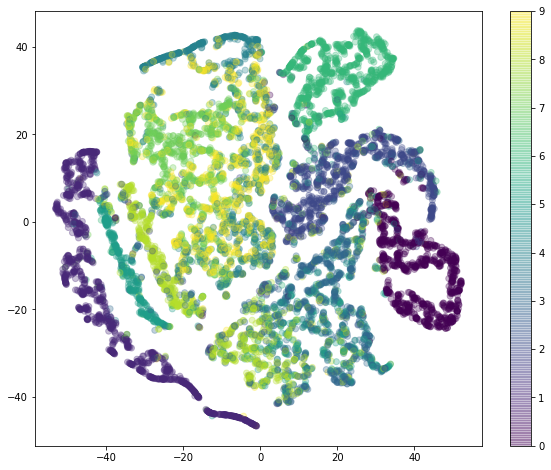

In [40]:
# plot
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_test.tolist(), alpha=.3)
plt.colorbar()
plt.show()

In [41]:
# import
import tensorflow as tf

In [42]:
# one hot
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_test_onehot.shape

(10000, 10)

In [43]:
# use svm
from sklearn import svm

In [44]:
# svm using rbf kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc = rbf_svc.fit(X_embedded, y_test)

In [45]:
# prediction
y_test_pred = rbf_svc.predict(X_embedded)

In [46]:
# library
from sklearn.metrics import classification_report

In [47]:
# classification report
target_names = ['digit'+str(i) for i in range(10)]
print(classification_report(y_true=y_test, y_pred=y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      digit0       0.90      0.94      0.92       980
      digit1       0.97      0.98      0.97      1135
      digit2       0.80      0.88      0.84      1032
      digit3       0.55      0.72      0.62      1010
      digit4       0.62      0.51      0.56       982
      digit5       0.82      0.36      0.50       892
      digit6       0.96      0.90      0.93       958
      digit7       0.65      0.65      0.65      1028
      digit8       0.62      0.71      0.66       974
      digit9       0.45      0.51      0.48      1009

    accuracy                           0.72     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.72      0.72     10000



Investigation ends here.

## Training

In [ ]:
# run
some_result_ = YinsDL.NeuralNet_Regressor(
            X_train=x_train,
            y_train=x_train, 
            X_valid=x_test, 
            y_valid=x_test, 
            X_test=x_test, 
            y_test=x_test,
            name_of_architecture="ANN",
            input_shape=784,
            use_auxinput=False,
            num_of_res_style_block=None,
            hidden=[128,64,32,2,32,64,128],
            output_shape=784,
            activation="relu",
            last_activation="sigmoid",
            learning_rate=0.001,
            loss="mae",
            name_of_optimizer="adam",
            epochs=10,
            plotModelSummary=True,
            axis_font_size=20,
            which_layer=4,
            X_for_internal_extraction=x_test,
            useGPU=False,
            use_earlystopping=False,
            do_plot=False,
            verbose=True
        )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 dense1 (Dense)              (None, 128)               100480    
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 dense4 (Dense)              (None, 2)                 66        
                                                                 
 dense5 (Dense)              (None, 32)                96        
                                                                 
 dense6 (Dense)              (None, 64)                2112    

In [ ]:
# output
some_result_.keys()

dict_keys(['Data', 'Model', 'History', 'Extracted Internal Layer', 'Train Result', 'Test Result'])

In [ ]:
# extracted layer
latent_layer = some_result_['Extracted Internal Layer']['internal_layer']
latent_layer.shape

(10000, 2)

## TSNE: High-dimensional Latent Layer

In [122]:
# run
some_result_ = YinsDL.NeuralNet_Regressor(
            X_train=x_train,
            y_train=x_train, 
            X_valid=x_test, 
            y_valid=x_test, 
            X_test=x_test, 
            y_test=x_test,
            name_of_architecture="ANN",
            input_shape=784,
            use_auxinput=False,
            num_of_res_style_block=None,
            hidden=[128,64,32,20,32,64,128],
            output_shape=784,
            activation="relu",
            last_activation="sigmoid",
            learning_rate=0.001,
            loss="mae",
            name_of_optimizer="adam",
            epochs=10,
            plotModelSummary=True,
            axis_font_size=20,
            which_layer=4,
            X_for_internal_extraction=x_test,
            useGPU=False,
            use_earlystopping=False,
            do_plot=False,
            verbose=True
        )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 dense1 (Dense)              (None, 128)               100480    
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 dense4 (Dense)              (None, 20)                660       
                                                                 
 dense5 (Dense)              (None, 32)                672       
                                                                 
 dense6 (Dense)              (None, 64)                2112    

In [123]:
# extracted layer
latent_layer = some_result_['Extracted Internal Layer']['internal_layer']
latent_layer.shape

(10000, 20)

### Fit TSNE

In [168]:
# fit tsne
X_embedded = TSNE(
        n_components=3,
        init="pca",
        learning_rate="auto",
        n_iter=600,
        n_iter_without_progress=200,
        n_jobs=2,
        random_state=0).fit_transform(latent_layer)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [169]:
# shape
X_embedded.shape

(10000, 3)

### Plot

In [170]:
# import
import matplotlib.pyplot as plt

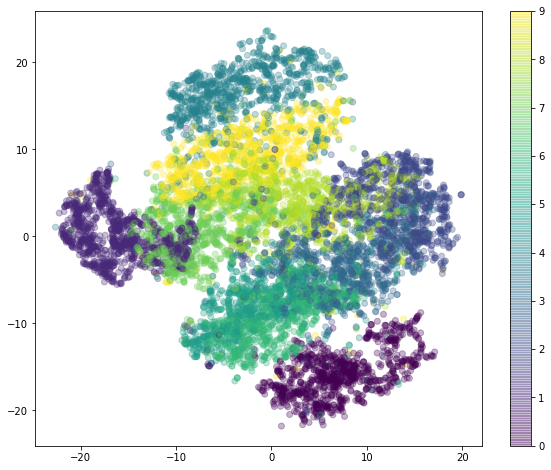

In [171]:
# plot
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_test.tolist(), alpha=.3)
plt.colorbar()
plt.show()

In [172]:
# import
import tensorflow as tf

In [173]:
# one hot
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_test_onehot.shape

(10000, 10)

In [174]:
# use svm
from sklearn import svm

In [175]:
# svm using rbf kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc = rbf_svc.fit(X_embedded, y_test)

In [176]:
# prediction
y_test_pred = rbf_svc.predict(X_embedded)

In [177]:
# library
from sklearn.metrics import classification_report

In [178]:
# classification report
target_names = ['digit'+str(i) for i in range(10)]
print(classification_report(y_true=y_test, y_pred=y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      digit0       0.96      0.98      0.97       980
      digit1       0.97      0.98      0.98      1135
      digit2       0.95      0.92      0.94      1032
      digit3       0.88      0.89      0.89      1010
      digit4       0.95      0.87      0.91       982
      digit5       0.91      0.86      0.88       892
      digit6       0.95      0.97      0.96       958
      digit7       0.96      0.91      0.93      1028
      digit8       0.85      0.91      0.88       974
      digit9       0.84      0.91      0.88      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Investigation ends here.